# Pizza Place Sales Analysis

In [ ]:
### Importing the needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Loading the Datasets  into a Data frame
data_dictionary = pd.read_csv('Downloads/data_dictionary.csv', encoding='latin-1')
order_details= pd.read_csv('Downloads/order_details.csv', encoding='latin-1')
orders= pd.read_csv('Downloads/orders.csv', encoding='latin-1')
pizza_types= pd.read_csv('Downloads/pizza_types.csv', encoding='latin-1')
pizzas= pd.read_csv('Downloads/pizzas.csv', encoding='latin-1')

In [ ]:
### Previewing the Datasets
orders.head()

,order_id,date,time
0,1,2015-01-01,11:38:36
1,2,2015-01-01,11:57:40
2,3,2015-01-01,12:12:28
3,4,2015-01-01,12:16:31
4,5,2015-01-01,12:21:30


In [ ]:
order_details.head()

,order_details_id,order_id,pizza_id,quantity
0,1,1,hawaiian_m,1
1,2,2,classic_dlx_m,1
2,3,2,five_cheese_l,1
3,4,2,ital_supr_l,1
4,5,2,mexicana_m,1


In [ ]:
pizzas.head()

,pizza_id,pizza_type_id,size,price
0,bbq_ckn_s,bbq_ckn,S,12.75
1,bbq_ckn_m,bbq_ckn,M,16.75
2,bbq_ckn_l,bbq_ckn,L,20.75
3,cali_ckn_s,cali_ckn,S,12.75
4,cali_ckn_m,cali_ckn,M,16.75


In [ ]:
pizza_types.head()

,pizza_type_id,name,category,ingredients
0,bbq_ckn,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,..."
1,cali_ckn,The California Chicken Pizza,Chicken,"Chicken, Artichoke, Spinach, Garlic, Jalapeno ..."
2,ckn_alfredo,The Chicken Alfredo Pizza,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A..."
3,ckn_pesto,The Chicken Pesto Pizza,Chicken,"Chicken, Tomatoes, Red Peppers, Spinach, Garli..."
4,southw_ckn,The Southwest Chicken Pizza,Chicken,"Chicken, Tomatoes, Red Peppers, Red Onions, Ja..."


In [ ]:
data_dictionary.head()

,Table,Field,Description
0,orders,order_id,Unique identifier for each order placed by a t...
1,orders,date,Date the order was placed (entered into the sy...
2,orders,time,Time the order was placed (entered into the sy...
3,order_details,order_details_id,Unique identifier for each pizza placed within...
4,order_details,order_id,Foreign key that ties the details in each orde...


In [ ]:
#Data cleaning
# Check info
orders.info()

# Check missing values
orders.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21350 entries, 0 to 21349
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   order_id  21350 non-null  int64 
 1   date      21350 non-null  object
 2   time      21350 non-null  object
dtypes: int64(1), object(2)
memory usage: 500.5+ KB


order_id    0
date        0
time        0
dtype: int64

In [ ]:
# Check info
pizza_types.info()

# Check missing values
pizza_types.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   pizza_type_id  32 non-null     object
 1   name           32 non-null     object
 2   category       32 non-null     object
 3   ingredients    32 non-null     object
dtypes: object(4)
memory usage: 1.1+ KB


pizza_type_id    0
name             0
category         0
ingredients      0
dtype: int64

In [ ]:
# Check info
pizzas.info()

# Check missing values
pizzas.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   pizza_id       96 non-null     object 
 1   pizza_type_id  96 non-null     object 
 2   size           96 non-null     object 
 3   price          96 non-null     float64
dtypes: float64(1), object(3)
memory usage: 3.1+ KB


pizza_id         0
pizza_type_id    0
size             0
price            0
dtype: int64

In [ ]:
# Check info
order_details.info()

# Check missing values
order_details.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   order_details_id  48620 non-null  int64 
 1   order_id          48620 non-null  int64 
 2   pizza_id          48620 non-null  object
 3   quantity          48620 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


order_details_id    0
order_id            0
pizza_id            0
quantity            0
dtype: int64

In [ ]:
### Merging the Datasets
# Merging order_details with pizzas
order_details = order_details.merge(pizzas, on='pizza_id', how='left')
# Merging order_details with pizza_types
order_details = order_details.merge(pizza_types, on='pizza_type_id', how='left')
# Merging order_details with orders
full_data = order_details.merge(orders, on='order_id', how='left')

In [ ]:
# Converting the date and time columns
full_data['date'] = pd.to_datetime(full_data['date'])
full_data['time'] = pd.to_datetime(full_data['time'], format='%H:%M:%S').dt.time

full_data.head()

,order_details_id,order_id,pizza_id,quantity,pizza_type_id,size,price,name,category,ingredients,date,time
0,1,1,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",2015-01-01,11:38:36
1,2,2,classic_dlx_m,1,classic_dlx,M,16.00,The Classic Deluxe Pizza,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",2015-01-01,11:57:40
2,3,2,five_cheese_l,1,five_cheese,L,18.50,The Five Cheese Pizza,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",2015-01-01,11:57:40
3,4,2,ital_supr_l,1,ital_supr,L,20.75,The Italian Supreme Pizza,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",2015-01-01,11:57:40
4,5,2,mexicana_m,1,mexicana,M,16.00,The Mexicana Pizza,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",2015-01-01,11:57:40


## Exploratory Data Analysis (EDA)

The total Revenue was $817,860.05
The total quantity sold was 49574
The total Orders was 21350
The number of pizza types sold was 32
The average pizza price was $16.44


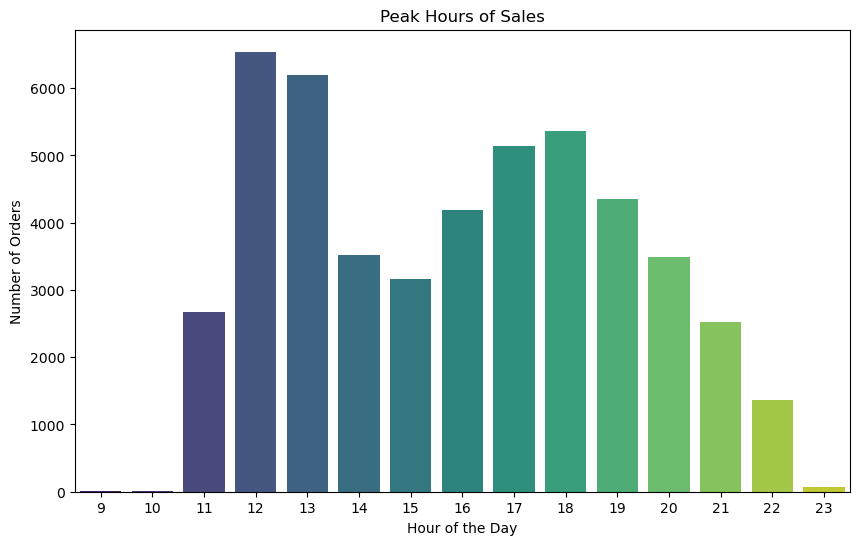

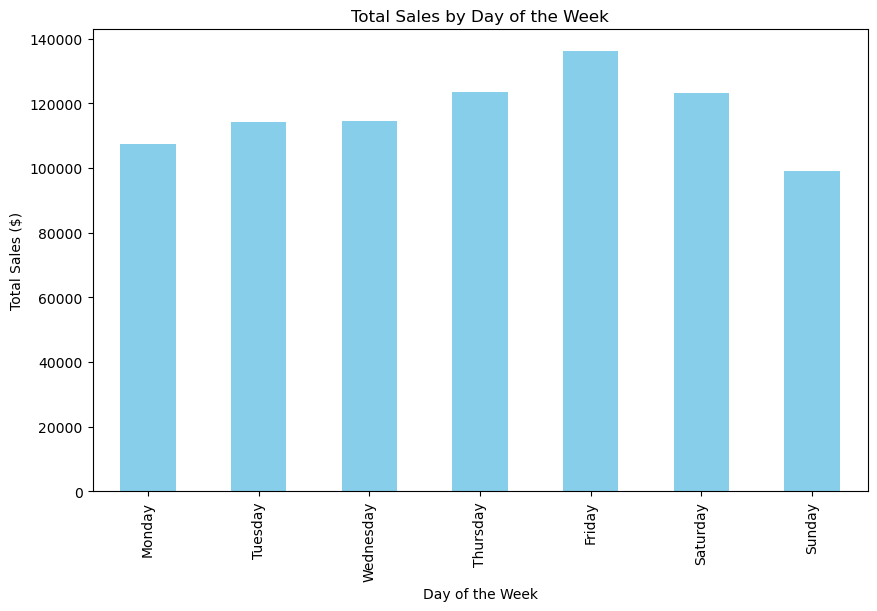

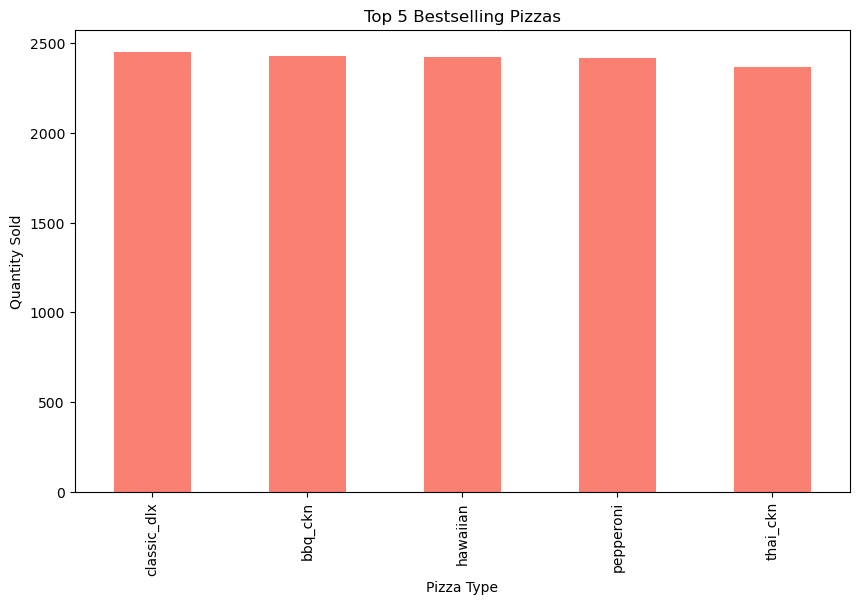

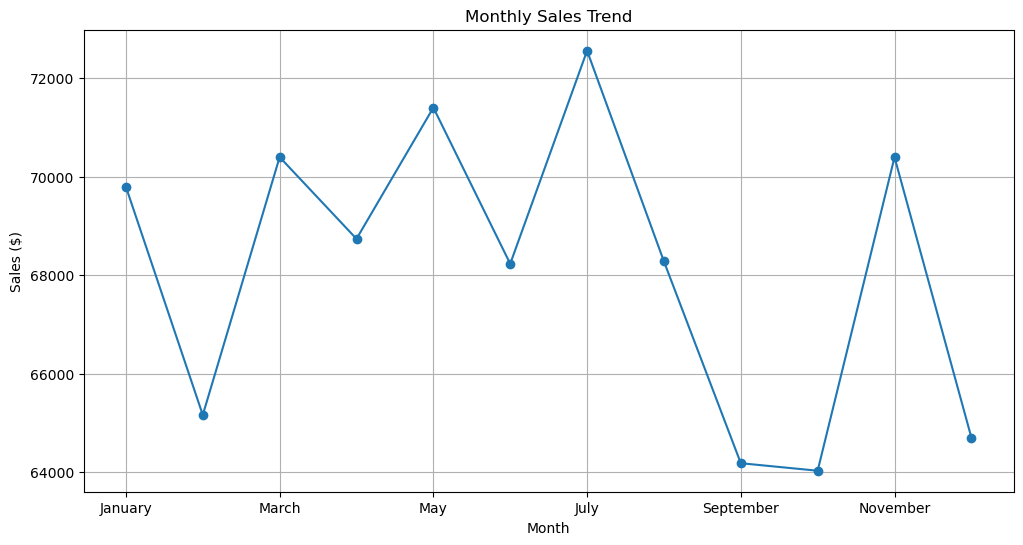

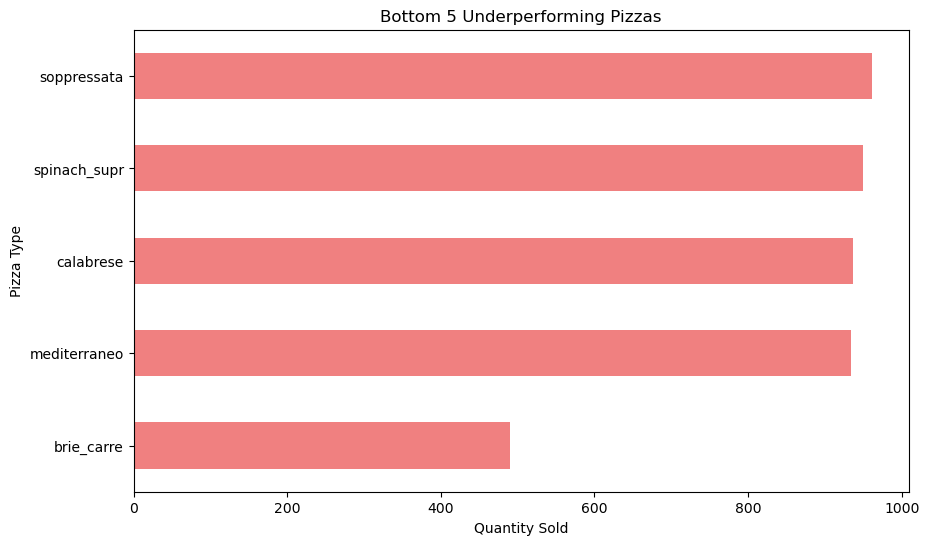

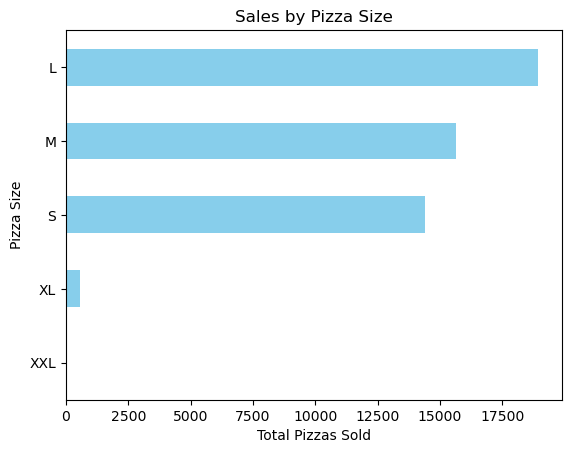

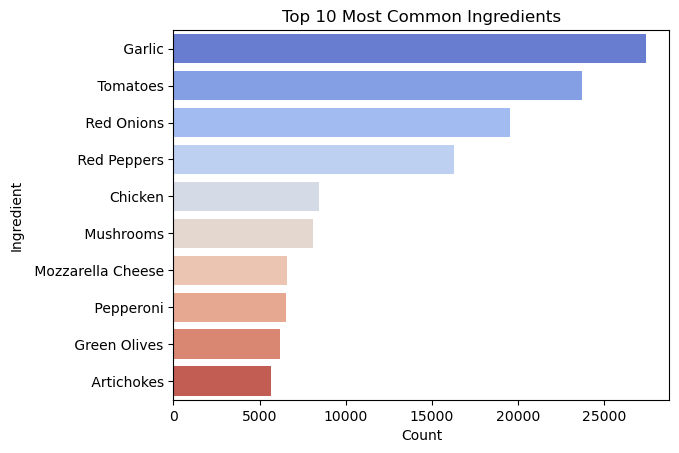

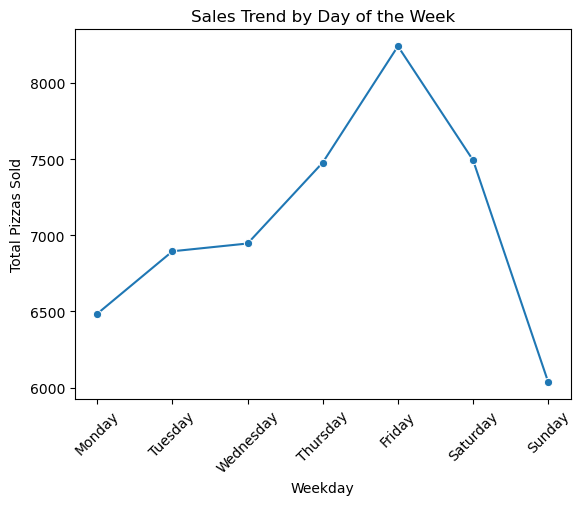

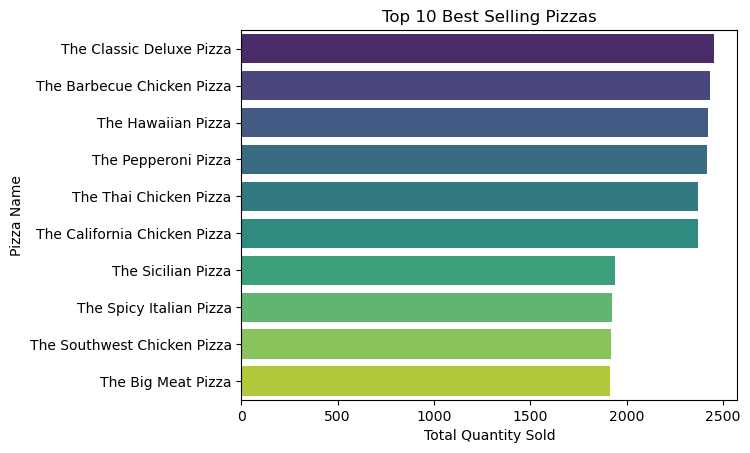

In [ ]:
#1. Total Revenue/Sales
total_revenue = (full_data['price'] * full_data['quantity']).sum()
print(f"The total Revenue was ${total_revenue:,.2f}")

#2. Total Quantity Sold
total_quantity = full_data['quantity'].sum()
print(f"The total quantity sold was {total_quantity}")

#3. Total Orders
total_orders = orders['order_id'].nunique()
print(f"The total Orders was {total_orders}")

#4. Number of Pizza Types Sold
pizza_types_sold = full_data['pizza_type_id'].nunique()
print(f"The number of pizza types sold was {pizza_types_sold}")

#5. Average Price of Pizzas
average_price = pizzas['price'].mean()
print(f"The average pizza price was ${average_price:.2f}")

#6. Peak Hours of Sales
full_data['hour'] = pd.to_datetime(full_data['time'].astype(str)).dt.hour

plt.figure(figsize=(10,6))
sns.countplot(x='hour', data=full_data, palette='viridis')
plt.title('Peak Hours of Sales')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Orders')
plt.show()

#7. Sales by Day of the Week
full_data['day_of_week'] = full_data['date'].dt.day_name()

sales_by_day = full_data.groupby('day_of_week').apply(lambda x: (x['price'] * x['quantity']).sum())
sales_by_day = sales_by_day.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

sales_by_day.plot(kind='bar', figsize=(10,6), color='skyblue')
plt.title('Total Sales by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Sales ($)')
plt.show()

#8. Top 5 Bestselling Pizzas
bestselling_pizzas = full_data.groupby('pizza_type_id')['quantity'].sum().sort_values(ascending=False).head(5)

bestselling_pizzas.plot(kind='bar', figsize=(10,6), color='salmon')
plt.title('Top 5 Bestselling Pizzas')
plt.xlabel('Pizza Type')
plt.ylabel('Quantity Sold')
plt.show()

#9. Monthly Sales and Trend Analysis
full_data['month'] = full_data['date'].dt.month_name()
monthly_sales = full_data.groupby('month').apply(lambda x: (x['price'] * x['quantity']).sum())

# Order months
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
monthly_sales = monthly_sales.reindex(month_order)

monthly_sales.plot(kind='line', marker='o', figsize=(12,6))
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Sales ($)')
plt.grid(True)
plt.show()

#10. Underperforming Pizzas
pizza_sales = full_data.groupby('pizza_type_id')['quantity'].sum().sort_values()

# Bottom 5 Pizzas
bottom_pizzas = pizza_sales.head(5)

bottom_pizzas.plot(kind='barh', figsize=(10,6), color='lightcoral')
plt.title('Bottom 5 Underperforming Pizzas')
plt.xlabel('Quantity Sold')
plt.ylabel('Pizza Type')
plt.show()

# Additional Insights

#11. Pizza size popularity
size_sales = full_data.groupby('size')['quantity'].sum().sort_values()

# Plot
size_sales.plot(kind='barh', color='skyblue')
plt.title('Sales by Pizza Size')
plt.xlabel('Total Pizzas Sold')
plt.ylabel('Pizza Size')
plt.show()

#12. Popular ingredients
# Split ingredients into separate words
ingredient_list = full_data['ingredients'].str.split(',').explode()

top_ingredients = ingredient_list.value_counts().head(10)

# Plot
sns.barplot(y=top_ingredients.index, x=top_ingredients.values, palette='coolwarm')
plt.title('Top 10 Most Common Ingredients')
plt.xlabel('Count')
plt.ylabel('Ingredient')
plt.show()

#13. Weekly Sales Trend (Seasonality)
# Extract week day
full_data['weekday'] = full_data['date'].dt.day_name()

weekday_sales = full_data.groupby('weekday')['quantity'].sum().reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
])

# Plot
sns.lineplot(x=weekday_sales.index, y=weekday_sales.values, marker='o')
plt.title('Sales Trend by Day of the Week')
plt.ylabel('Total Pizzas Sold')
plt.xlabel('Weekday')
plt.xticks(rotation=45)
plt.show()


#14. Top 10 best selling pizzas
top_pizzas = full_data.groupby('name')['quantity'].sum().sort_values(ascending=False).head(10)

# Plot
sns.barplot(x=top_pizzas.values, y=top_pizzas.index, palette="viridis")
plt.title('Top 10 Best Selling Pizzas')
plt.xlabel('Total Quantity Sold')
plt.ylabel('Pizza Name')
plt.show()
